In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

# Get the current working directory
base_dir = os.getcwd()

data_dir = 'C:/Users/HP/Desktop/Uni work/Projets/Prediction du Churn/data'

df_bigml_20 = pd.read_csv(os.path.join(data_dir, 'churn-bigml-20.csv'))
df_bigml_80 = pd.read_csv(os.path.join(data_dir, 'churn-bigml-80.csv'))

# Display basic information about the datasets
print("First dataset (20%) shape:", df_bigml_20.shape)
print("Second dataset (80%) shape:", df_bigml_80.shape)

# Display the first few rows of each dataset
print("\nSample from 20% dataset:")
df_bigml_20.head()

First dataset (20%) shape: (667, 20)
Second dataset (80%) shape: (2666, 20)

Sample from 20% dataset:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [8]:
# Check for missing values
print("Missing values in 20% dataset:")
print(df_bigml_20.isnull().sum())
print("\nMissing values in 80% dataset:")
print(df_bigml_80.isnull().sum())

Missing values in 20% dataset:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Missing values in 80% dataset:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0


In [9]:
# Check data types
print("Data types in 20% dataset:")
print(df_bigml_20.dtypes)

Data types in 20% dataset:
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [10]:
# Basic statistics for numerical features
df_bigml_20.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [11]:
# Check unique values for categorical columns
categorical_cols = df_bigml_20.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values for {col}:")
    print(df_bigml_20[col].value_counts())


Unique values for State:
State
AZ    19
ND    18
WV    18
NJ    18
KS    18
NM    18
WA    18
RI    17
ID    17
MS    17
WI    17
TX    17
IN    17
LA    16
NE    16
OR    16
KY    16
VT    16
NY    15
MI    15
MT    15
CT    15
AL    14
MN    14
MA    13
IL    13
ME    13
NH    13
TN    12
UT    12
NC    12
MO    12
OH    12
SD    11
WY    11
SC    11
CA    10
DE    10
VA    10
MD    10
FL     9
AK     9
DC     9
HI     9
PA     9
OK     9
AR     8
CO     7
IA     6
NV     5
GA     5
Name: count, dtype: int64

Unique values for International plan:
International plan
No     614
Yes     53
Name: count, dtype: int64

Unique values for Voice mail plan:
Voice mail plan
No     478
Yes    189
Name: count, dtype: int64


In [12]:
# Combine both datasets for full analysis
df_combined = pd.concat([df_bigml_20, df_bigml_80], axis=0)
print("Combined dataset shape:", df_combined.shape)

Combined dataset shape: (3333, 20)


In [13]:
# Check for duplicate records
print("Number of duplicate records:", df_combined.duplicated().sum())

Number of duplicate records: 0


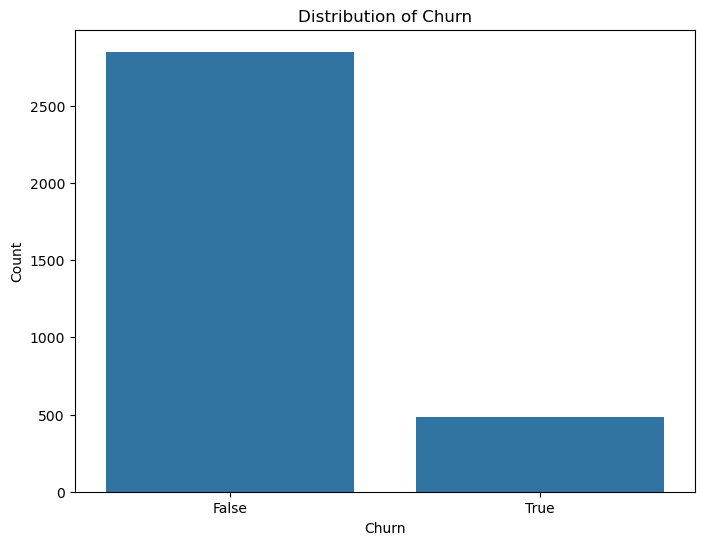

Churn percentage:
False: 85.51%
True: 14.49%


In [14]:
# Distribution of target variable (churn)
plt.figure(figsize=(8, 6))
churn_counts = df_combined['Churn'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Calculate percentage
churn_percentage = churn_counts / len(df_combined) * 100
print("Churn percentage:")
for category, percentage in zip(churn_counts.index, churn_percentage):
    print(f"{category}: {percentage:.2f}%")

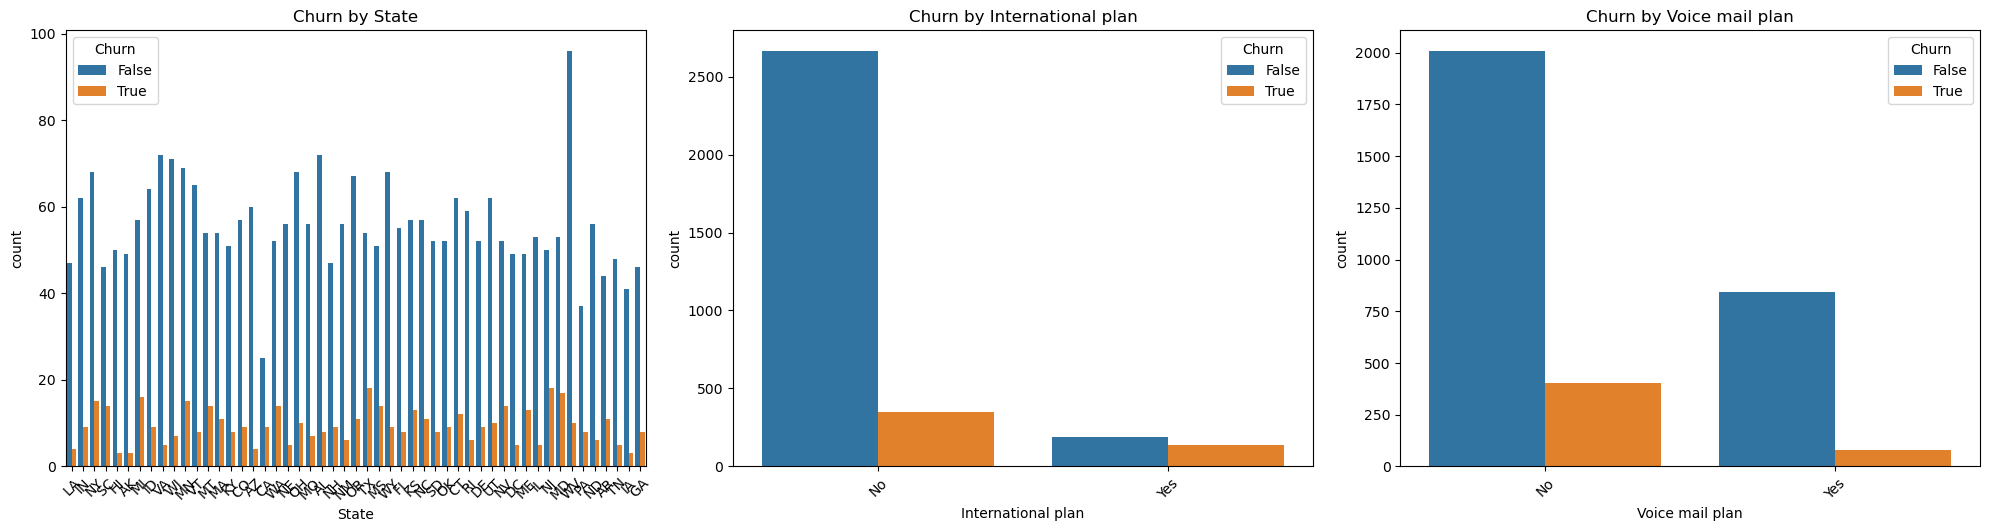

In [15]:
# Explore relationship between categorical features and churn
categorical_cols = df_combined.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Churn']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Churn', data=df_combined)
    plt.xticks(rotation=45)
    plt.title(f'Churn by {col}')
plt.tight_layout()
plt.show()

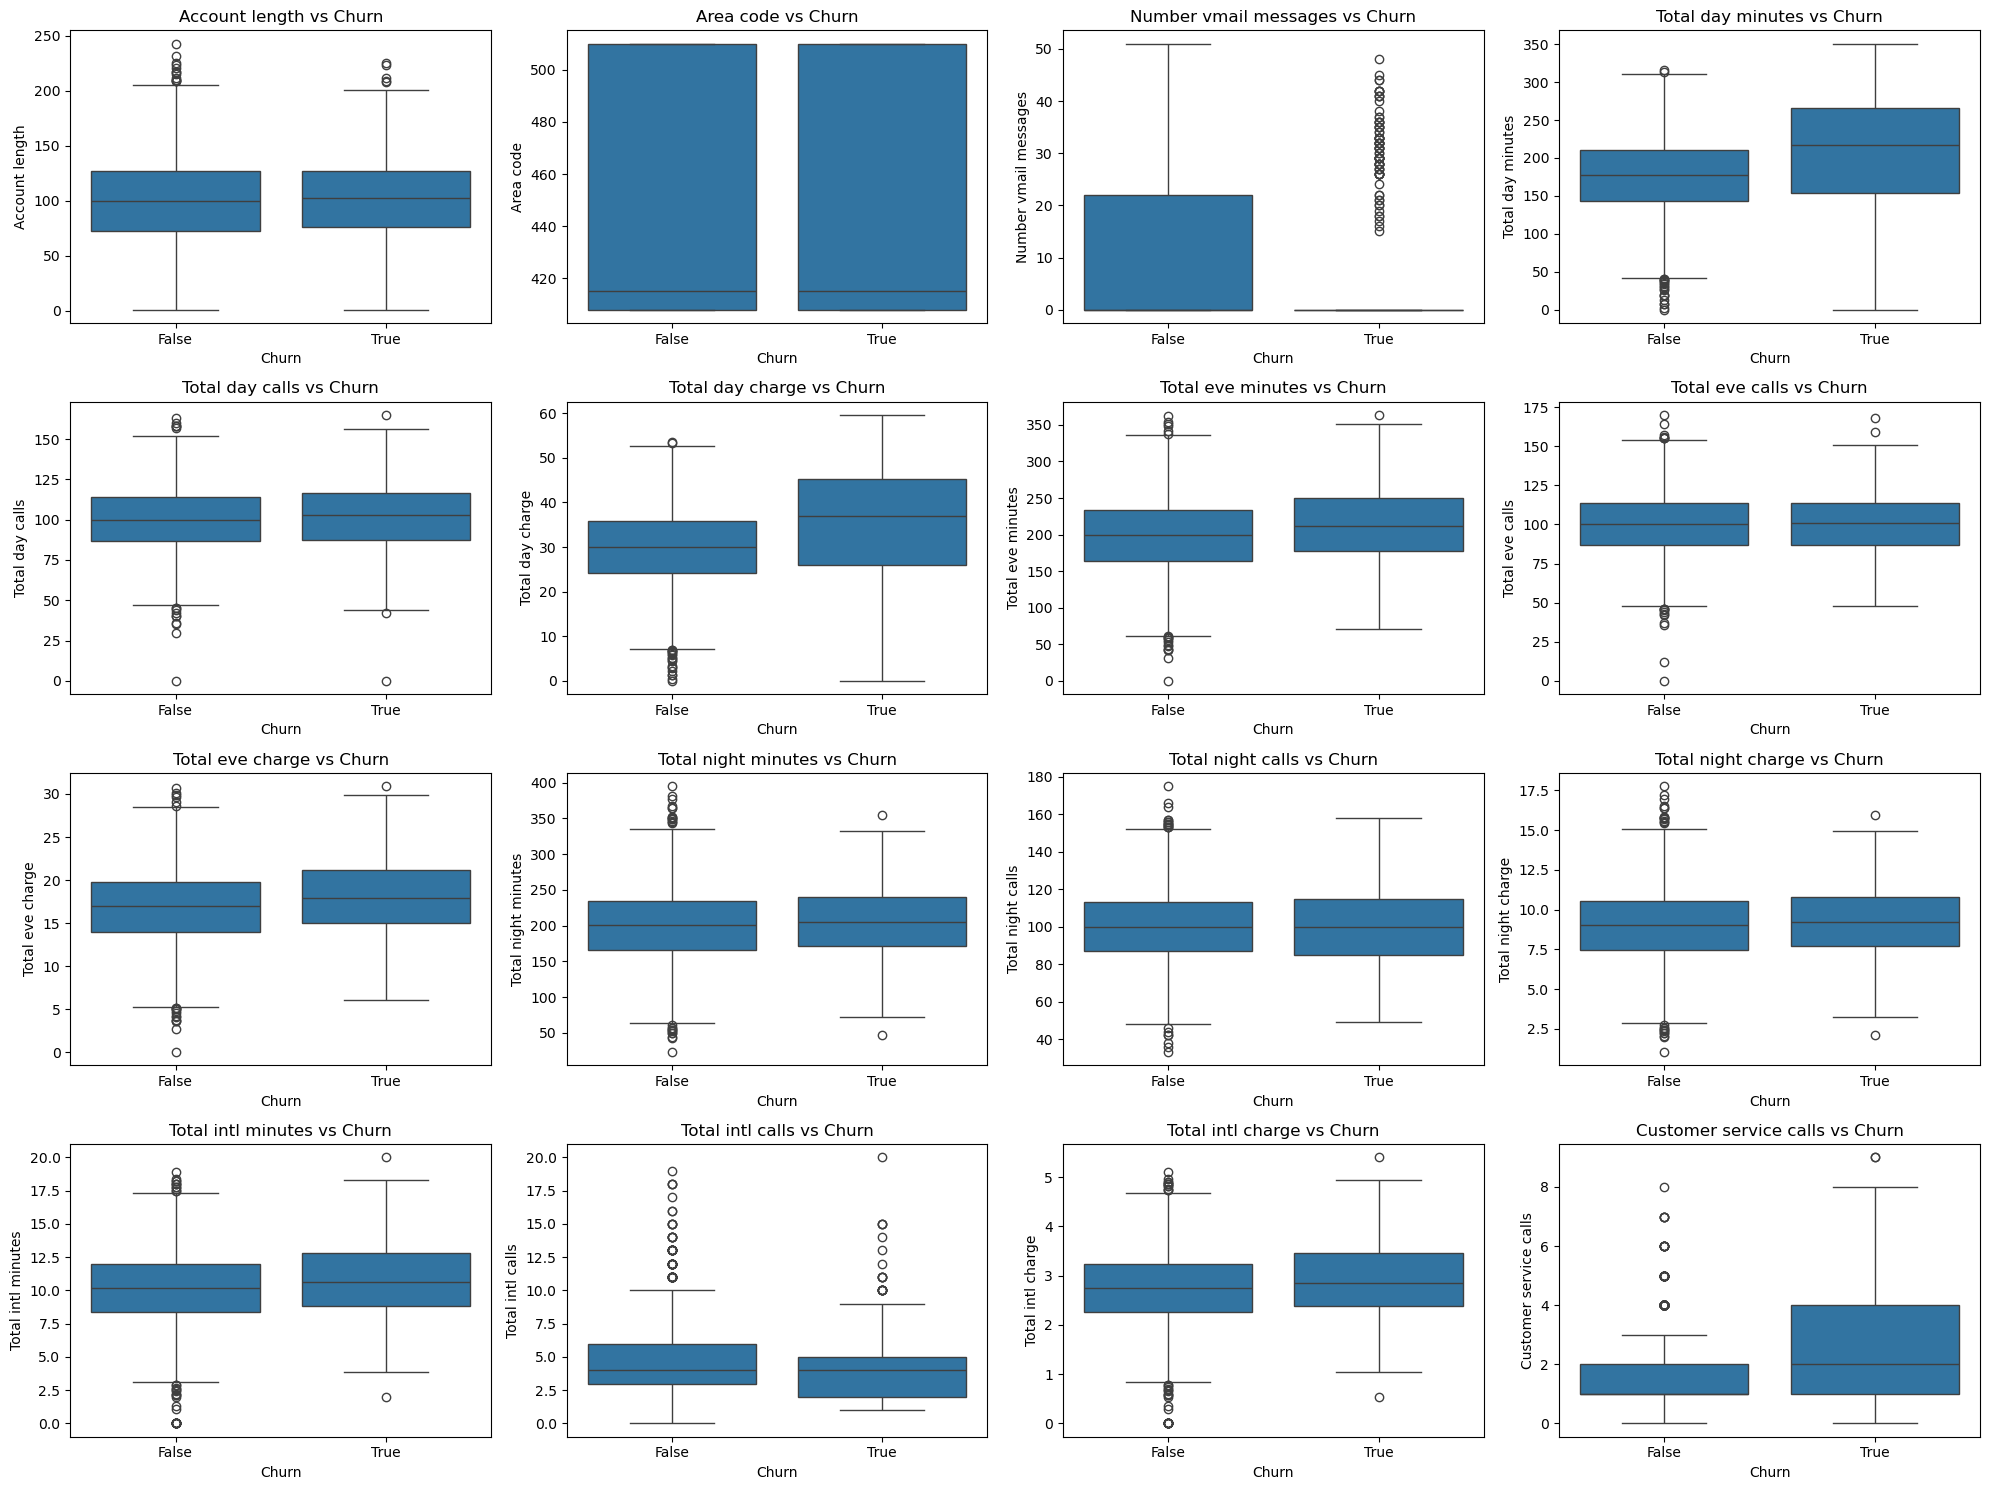

In [16]:
# Explore relationship between numerical features and churn
numerical_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Churn', y=col, data=df_combined)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

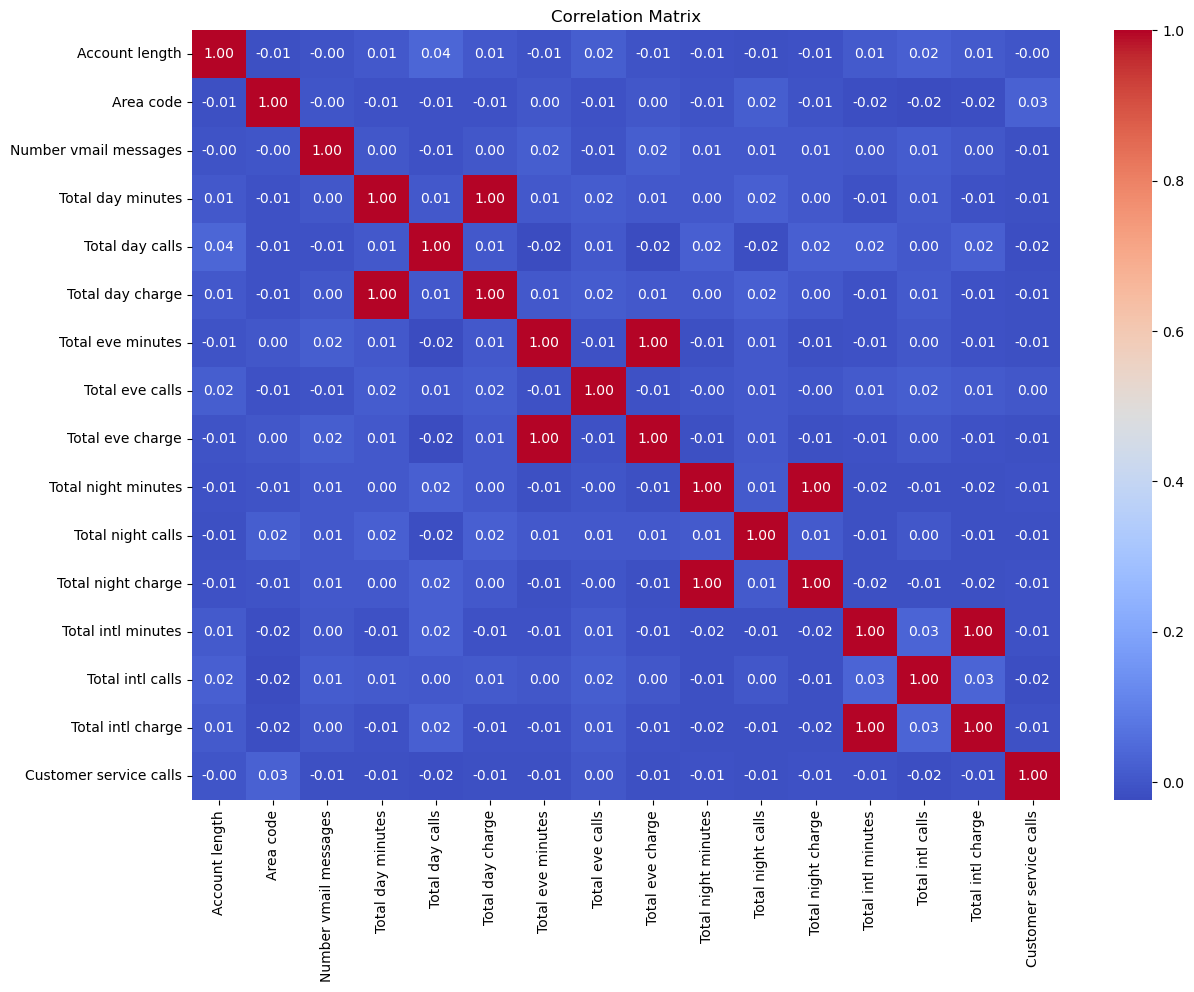

In [17]:
# Correlation matrix for numerical features
plt.figure(figsize=(14, 10))
correlation_matrix = df_combined.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Key insights from data exploration
print("Key insights from data exploration:")
print("1. Dataset has {} samples with {} features.".format(df_combined.shape[0], df_combined.shape[1]))
print("2. Target variable distribution shows {}% customers churned.".format(
    df_combined['Churn'].value_counts(normalize=True).iloc[1] * 100))
print("3. Several categorical and numerical features show correlation with churn.")
print("4. No missing values found in the dataset.")

Key insights from data exploration:
1. Dataset has 3333 samples with 20 features.
2. Target variable distribution shows 14.491449144914492% customers churned.
3. Several categorical and numerical features show correlation with churn.
4. No missing values found in the dataset.
